<a href="https://colab.research.google.com/github/mpiatek26/Minimizing_churn_rate_through_analysis_of_financial_habits/blob/main/Minimizing_churn_rate_through_analysis_of_financial_habits_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#### Importing Libraries ####

import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [39]:
dataset = pd.read_csv('new_churn_data.csv')

In [40]:
dataset.head

<bound method NDFrame.head of        userid  churn   age rent_or_own  trivia_played  trivia_shared_results  \
0           0      1  22.0          na              0                      0   
1           7      1  25.0           R              0                      0   
2           8      1  32.0          na              0                      0   
3          18      1  26.0          na              0                      0   
4          19      1  28.0           R              0                      0   
...       ...    ...   ...         ...            ...                    ...   
48074    4950      0  42.0          na              0                      0   
48075   30078      0  38.0           O              0                      0   
48076   39581      0  20.0           R              5                      0   
48077    3036      0  27.0           R              0                      0   
48078   10687      0  33.0           R              3                      2   

       tr

In [41]:
## Data Preparation
user_identifier = dataset['userid']
dataset = dataset.drop(columns = ['userid'])

In [42]:
print(dataset.columns)

Index(['churn', 'age', 'rent_or_own', 'trivia_played', 'trivia_shared_results',
       'trivia_view_unlocked', 'trivia_view_results', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'payfreq', 'loan_pending',
       'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding',
       'zodiac_sign', 'un_linked_account', 're_linked_account',
       'cash_back_engagement', 'has_referred'],
      dtype='object')


In [43]:
## One-Hot Encoding
dataset.value_counts()
churn_unique_counts = dataset.groupby('churn').nunique().reset_index()
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'trivia_played', 'trivia_shared_results',
       'trivia_view_unlocked', 'trivia_view_results', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'loan_pending', 'withdrawn_application',
       'paid_off_loan', 'did_not_accept_funding', 'un_linked_account',
       're_linked_account', 'cash_back_engagement', 'has_referred',
       'rent_or_own_O', 'rent_or_own_R', 'rent_or_own_na', 'payfreq_Bi-Weekly',
       'payfreq_Monthly', 'payfreq_Semi-Monthly', 'payfreq_Weekly',
       'payfreq_na', 'zodiac_sign_Aquarius', 'zodiac_sign_Aries',
       'zodiac_sign_Cancer', 'zodiac_sign_Capricorn', 'zodiac_sign_Gemini',
       'zodiac_sign_Leo', 'zodiac_sign_Libra', 'zodiac_sign_Pisces',
       'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='ob

In [44]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [46]:
print(dataset.columns)

Index(['churn', 'age', 'trivia_played', 'trivia_shared_results',
       'trivia_view_unlocked', 'trivia_view_results', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'loan_pending', 'withdrawn_application',
       'paid_off_loan', 'did_not_accept_funding', 'un_linked_account',
       're_linked_account', 'cash_back_engagement', 'has_referred',
       'rent_or_own_O', 'rent_or_own_R', 'rent_or_own_na', 'payfreq_Bi-Weekly',
       'payfreq_Monthly', 'payfreq_Semi-Monthly', 'payfreq_Weekly',
       'payfreq_na', 'zodiac_sign_Aquarius', 'zodiac_sign_Aries',
       'zodiac_sign_Cancer', 'zodiac_sign_Capricorn', 'zodiac_sign_Gemini',
       'zodiac_sign_Leo', 'zodiac_sign_Libra', 'zodiac_sign_Pisces',
       'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='ob

In [47]:
dataset = dataset.drop(columns=['zodiac_sign_Aquarius', 'zodiac_sign_Aries',
       'zodiac_sign_Cancer', 'zodiac_sign_Capricorn', 'zodiac_sign_Gemini',
       'zodiac_sign_Leo', 'zodiac_sign_Libra', 'zodiac_sign_Pisces',
       'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo', 'zodiac_sign_na'])

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [49]:
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [50]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [51]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [53]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [55]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

0.619886721208307

Test Data Accuracy: 0.6231


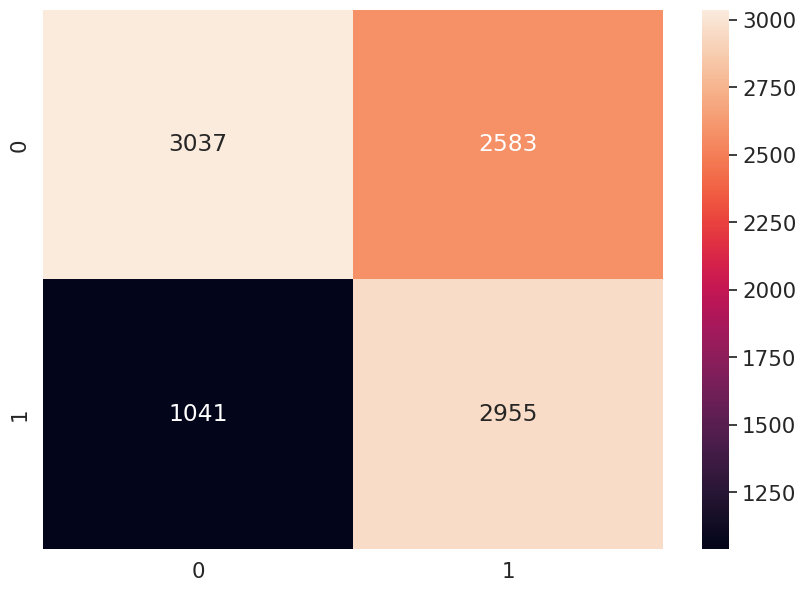

In [56]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [58]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.642 (+/- 0.019)


In [59]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.156158
1,trivia_played,0.693788
2,trivia_shared_results,-0.001825
3,trivia_view_unlocked,-0.709087
4,trivia_view_results,-0.785715
5,cards_share,0.028633
6,cards_viewed,0.048300
7,cards_helpful,-0.019638
8,cards_not_helpful,0.007115
9,cards_clicked,0.042597


In [62]:
#### Feature Selection ####


## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [63]:
# Model to Test
classifier = LogisticRegression()

In [65]:
# Select Best X Features
rfe = RFE(estimator=classifier, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [67]:
# summarize the selection of the attributes
print(rfe.support_)

[ True  True False  True  True False  True False False  True  True  True
  True False  True False  True  True  True  True  True  True False False
  True False  True False  True  True False]


In [68]:
print(rfe.ranking_)

[ 1  1 12  1  1  2  1  4  9  1  1  1  1  5  1  8  1  1  1  1  1  1  3  7
  1  6  1 11  1  1 10]


In [69]:
X_train.columns[rfe.support_]

Index(['age', 'trivia_played', 'trivia_view_unlocked', 'trivia_view_results',
       'cards_viewed', 'cards_clicked', 'has_used_mobile', 'has_used_web',
       'used_android', 'more_than_one_mobile_device', 'withdrawn_application',
       'paid_off_loan', 'did_not_accept_funding', 'un_linked_account',
       're_linked_account', 'cash_back_engagement', 'rent_or_own_R',
       'payfreq_Bi-Weekly', 'payfreq_Semi-Monthly', 'payfreq_Weekly'],
      dtype='object')

In [70]:
# New Correlation Matrix
sn.set(style="white")

In [71]:
# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

In [72]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<ipython-input-72-6bc7ca7c1c88>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


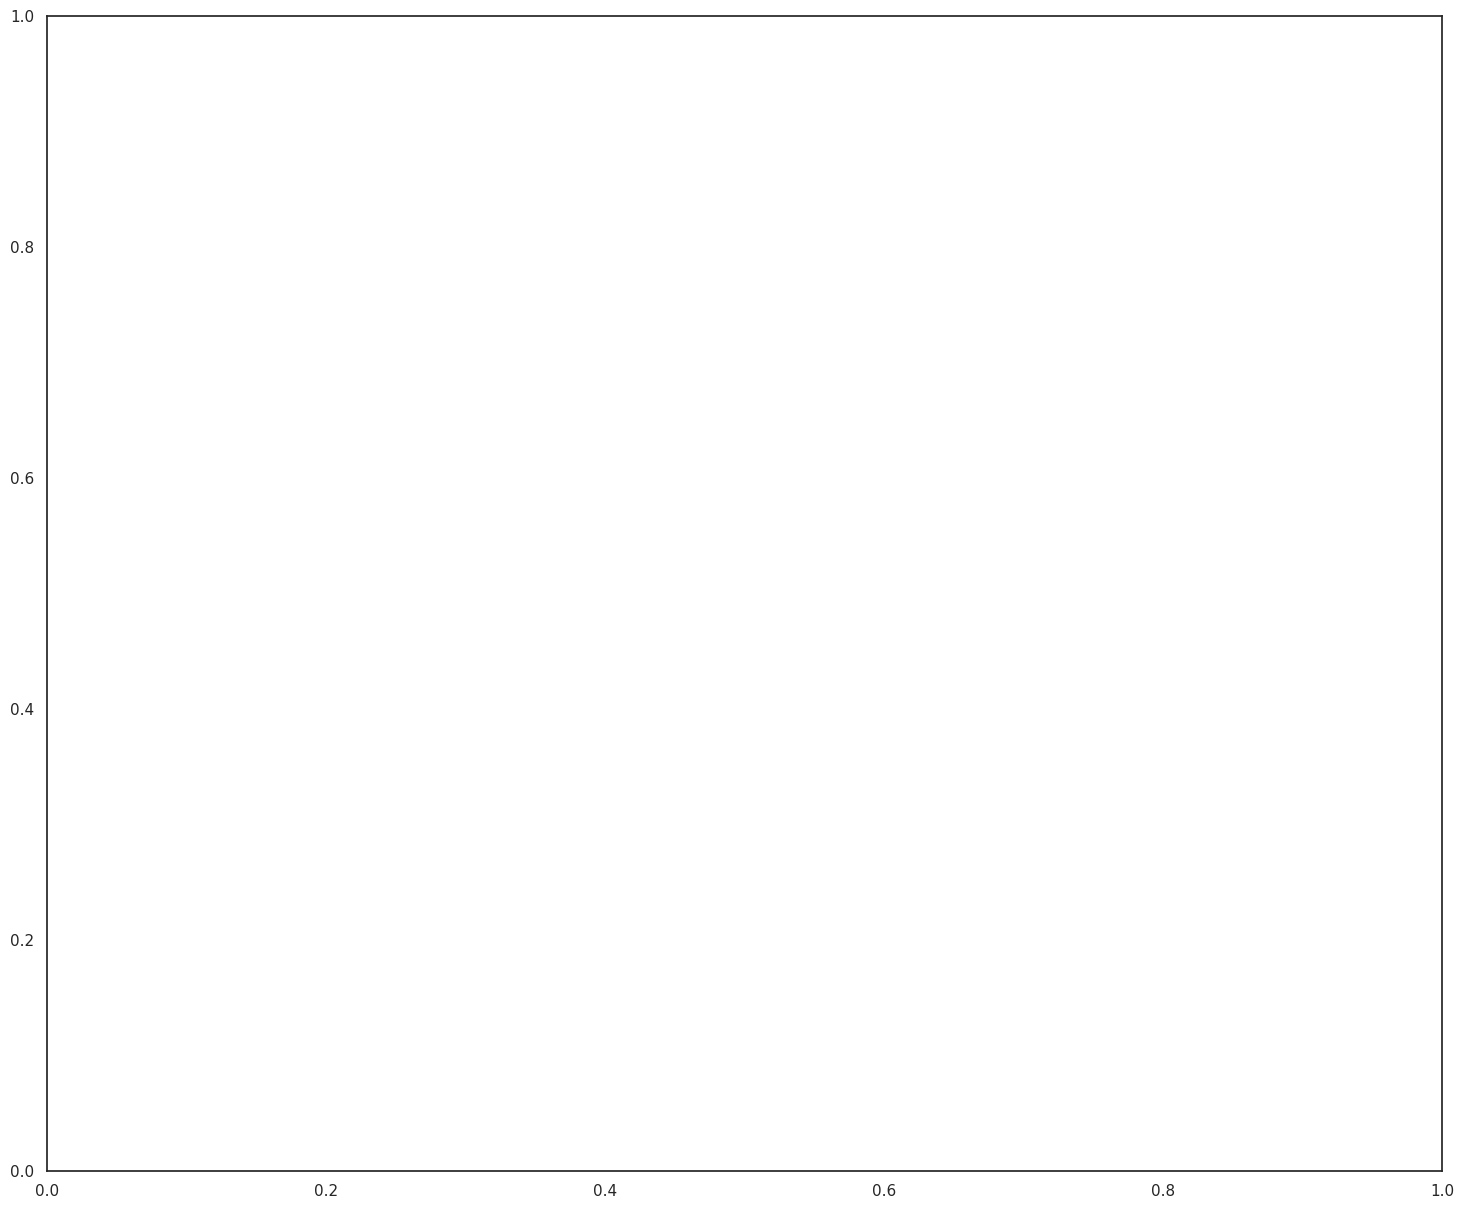

In [73]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

In [74]:
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

<Axes: >

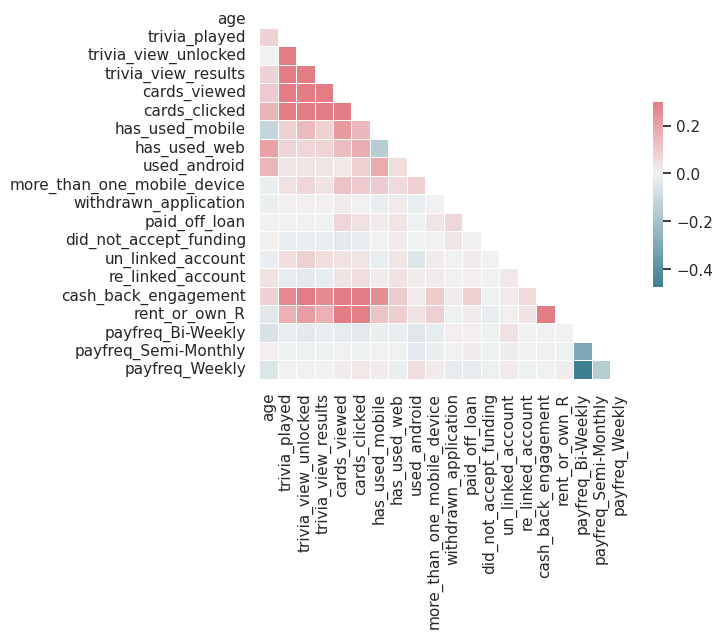

In [75]:
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression()

In [77]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [78]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

0.6192819009735162

Test Data Accuracy: 0.6218


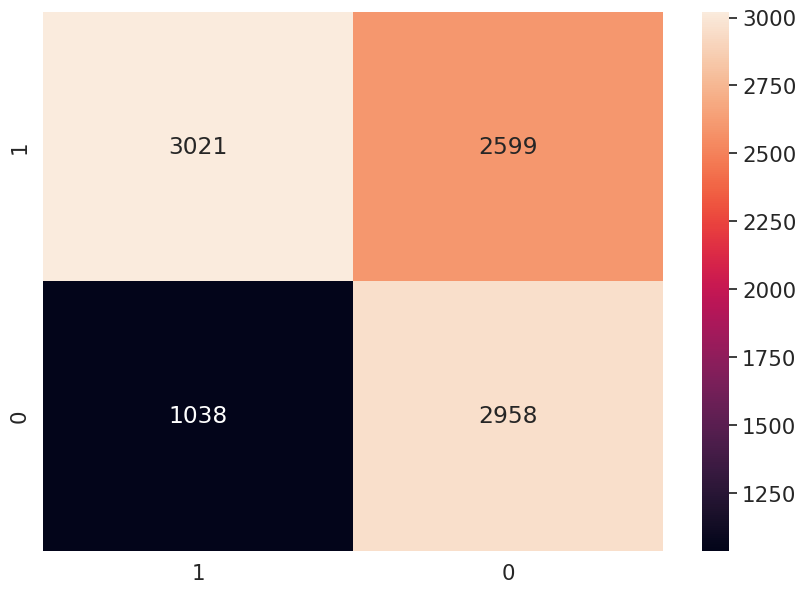

In [79]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [80]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 4)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.641 (+/- 0.011)


In [81]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.156665
1,trivia_played,0.697633
2,trivia_view_unlocked,-0.709377
3,trivia_view_results,-0.790839
4,cards_viewed,0.051423
5,cards_clicked,0.050912
6,has_used_mobile,-0.034004
7,has_used_web,0.144741
8,used_android,0.061620
9,more_than_one_mobile_device,0.112874


In [83]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()

In [84]:
final_results['predicted_churn'] = y_pred

In [86]:
final_results = final_results[['userid', 'churn', 'predicted_churn']].reset_index(drop=True)

In [87]:
final_results

,userid,churn,predicted_churn
0,26970,0.0,0
1,39288,0.0,0
2,50546,0.0,0
3,58750,0.0,1
4,10352,1.0,1
...,...,...,...
9611,68329,0.0,1
9612,66502,0.0,1
9613,46235,0.0,0
9614,43371,1.0,0
